In [1]:
import pandas as pd
import numpy as np


In [204]:
df = pd.read_csv("data_BCCBTC.csv")

In [205]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime 
import pandas as pd
import backtrader as bt


In [206]:

class MACDStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.datetime()
        print('%s, %s' % (dt, txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        # To keep track of pending orders
        self.order = None
        self.short_window = 10
        self.long_window = 40

    def notify(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enougth cash
        if order.status in [order.Completed, order.Canceled, order.Margin]:
#             if order.isbuy():
#                 self.log('BUY EXECUTED, %.2f' % (order.executed.price))
#             elif order.issell():
#                 self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        # Write down: no pending order
        self.order = None

    def next(self):
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        sma = 0
        lma = 0
        timelen = (self.datas[0].datetime.datetime() - pd.Timestamp("2017-06-25 00:00:00")).delta // (1000000000 * 60 * 60)
        if timelen == 1:
            return
        if timelen >= self.short_window:
            for i in range(self.short_window):
                sma += self.dataclose[-i]
            sma = sma / self.short_window
        else:
            for i in range(timelen):
                sma += self.dataclose[-i]
            sma = sma / timelen
            
        if timelen >= self.long_window:
            for i in range(self.long_window):
                lma += self.dataclose[-i]
            lma = lma / self.long_window
        else:
            for i in range(timelen):
                lma += self.dataclose[-i]
            lma = lma / timelen
        
        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if sma > lma:

                # BUY, BUY, BUY!!! (with default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
                print(self.broker.getvalue())

        else:

            # Already in the market ... we might sell
            if sma < lma:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
                print(self.broker.getvalue())

In [215]:
cerebro = bt.Cerebro()
cerebro.addstrategy(MACDStrategy)
dataframe = pd.read_csv('data.csv', index_col=0, parse_dates=True)
dataframe['openinterest'] = 0
data = bt.feeds.PandasData(dataname=dataframe,
                           fromdate=dataframe.index[0],
                           todate=dataframe.index[-1]
                           )
cerebro.adddata(data)
cerebro.broker.setcash(500.0)
cerebro.broker.setcommission(commission=0.001)

In [216]:
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 500.00


In [217]:
cerebro.run()

2017-07-02 16:00:00, BUY CREATE, 261.97
500.0
2017-07-04 18:00:00, SELL CREATE, 268.87
506.63802999999996
2017-07-06 03:00:00, BUY CREATE, 264.68
505.96956
2017-07-07 02:00:00, SELL CREATE, 261.43
502.36479
2017-07-08 23:00:00, BUY CREATE, 245.23
501.88358
2017-07-09 16:00:00, SELL CREATE, 239.30
495.89853999999997
2017-07-12 11:00:00, BUY CREATE, 200.55
495.73915999999997
2017-07-13 15:00:00, SELL CREATE, 196.73
490.69759
2017-07-17 07:00:00, BUY CREATE, 175.00
491.60975
2017-07-19 21:00:00, SELL CREATE, 196.64
513.07475
2017-07-20 16:00:00, BUY CREATE, 226.19
513.73725
2017-07-21 19:00:00, SELL CREATE, 216.76
504.11109000000005
2017-07-22 11:00:00, BUY CREATE, 227.82
503.83439000000004
2017-07-23 12:00:00, SELL CREATE, 226.54
502.26651000000004
2017-07-23 19:00:00, BUY CREATE, 232.58
502.04996000000006
2017-07-24 06:00:00, SELL CREATE, 225.22
494.42735000000005
2017-07-27 03:00:00, BUY CREATE, 201.86
494.20213000000007
2017-07-27 23:00:00, SELL CREATE, 202.54
494.68027000000006
2017-

2018-01-04 22:00:00, BUY CREATE, 948.32
683.9194699999997
2018-01-04 23:00:00, BUY CREATE, 941.02
683.9194699999997
2018-01-05 00:00:00, BUY CREATE, 953.25
683.9194699999997
2018-01-05 01:00:00, BUY CREATE, 969.00
683.9194699999997
2018-01-05 02:00:00, BUY CREATE, 980.90
683.9194699999997
2018-01-05 03:00:00, BUY CREATE, 990.00
683.9194699999997
2018-01-05 04:00:00, BUY CREATE, 1000.50
683.9194699999997
2018-01-05 05:00:00, BUY CREATE, 996.75
683.9194699999997
2018-01-05 06:00:00, BUY CREATE, 1013.70
683.9194699999997
2018-01-05 07:00:00, BUY CREATE, 1003.00
683.9194699999997
2018-01-05 08:00:00, BUY CREATE, 1010.40
683.9194699999997
2018-01-05 09:00:00, BUY CREATE, 989.00
683.9194699999997
2018-01-05 10:00:00, BUY CREATE, 981.23
683.9194699999997
2018-01-05 11:00:00, BUY CREATE, 996.00
683.9194699999997
2018-01-05 12:00:00, BUY CREATE, 988.85
683.9194699999997
2018-01-05 13:00:00, BUY CREATE, 973.00
683.9194699999997
2018-01-05 14:00:00, BUY CREATE, 975.12
683.9194699999997
2018-01-05

2018-01-20 16:00:00, BUY CREATE, 1151.30
683.9194699999997
2018-01-20 17:00:00, BUY CREATE, 1143.90
683.9194699999997
2018-01-20 18:00:00, BUY CREATE, 1157.60
683.9194699999997
2018-01-20 19:00:00, BUY CREATE, 1141.00
683.9194699999997
2018-01-20 20:00:00, BUY CREATE, 1149.00
683.9194699999997
2018-01-20 21:00:00, BUY CREATE, 1156.00
683.9194699999997
2018-01-20 22:00:00, BUY CREATE, 1152.00
683.9194699999997
2018-01-20 23:00:00, BUY CREATE, 1146.30
683.9194699999997
2018-01-21 00:00:00, BUY CREATE, 1105.00
683.9194699999997
2018-01-21 01:00:00, BUY CREATE, 1120.70
683.9194699999997
2018-01-21 02:00:00, BUY CREATE, 1126.40
683.9194699999997
2018-01-21 03:00:00, BUY CREATE, 1120.20
683.9194699999997
2018-01-21 04:00:00, BUY CREATE, 1101.10
683.9194699999997
2018-01-21 05:00:00, BUY CREATE, 1083.70
683.9194699999997
2018-01-21 06:00:00, BUY CREATE, 1073.00
683.9194699999997
2018-01-21 07:00:00, BUY CREATE, 1070.00
683.9194699999997
2018-01-21 08:00:00, BUY CREATE, 1068.70
683.91946999999

683.9194699999997
2018-02-10 18:00:00, BUY CREATE, 829.19
683.9194699999997
2018-02-11 22:00:00, BUY CREATE, 831.71
683.9194699999997
2018-02-11 23:00:00, BUY CREATE, 810.64
683.9194699999997
2018-02-12 03:00:00, BUY CREATE, 844.50
683.9194699999997
2018-02-12 04:00:00, BUY CREATE, 845.48
683.9194699999997
2018-02-12 05:00:00, BUY CREATE, 835.36
683.9194699999997
2018-02-12 06:00:00, BUY CREATE, 840.00
683.9194699999997
2018-02-12 07:00:00, BUY CREATE, 845.71
683.9194699999997
2018-02-12 08:00:00, BUY CREATE, 866.19
683.9194699999997
2018-02-12 09:00:00, BUY CREATE, 869.35
683.9194699999997
2018-02-12 10:00:00, BUY CREATE, 870.28
683.9194699999997
2018-02-12 11:00:00, BUY CREATE, 856.40
683.9194699999997
2018-02-12 12:00:00, BUY CREATE, 866.79
683.9194699999997
2018-02-12 13:00:00, BUY CREATE, 855.72
683.9194699999997
2018-02-12 14:00:00, BUY CREATE, 841.05
683.9194699999997
2018-02-12 15:00:00, BUY CREATE, 855.74
683.9194699999997
2018-02-12 16:00:00, BUY CREATE, 854.65
683.9194699999

683.9194699999997
2018-03-02 05:00:00, BUY CREATE, 869.05
683.9194699999997
2018-03-02 06:00:00, BUY CREATE, 873.00
683.9194699999997
2018-03-02 07:00:00, BUY CREATE, 869.79
683.9194699999997
2018-03-02 08:00:00, BUY CREATE, 870.96
683.9194699999997
2018-03-02 09:00:00, BUY CREATE, 862.95
683.9194699999997
2018-03-02 10:00:00, BUY CREATE, 860.84
683.9194699999997
2018-03-02 11:00:00, BUY CREATE, 860.14
683.9194699999997
2018-03-02 12:00:00, BUY CREATE, 862.37
683.9194699999997
2018-03-03 13:00:00, BUY CREATE, 864.82
683.9194699999997
2018-03-03 17:00:00, BUY CREATE, 862.90
683.9194699999997
2018-03-03 18:00:00, BUY CREATE, 861.01
683.9194699999997
2018-03-03 19:00:00, BUY CREATE, 859.81
683.9194699999997
2018-03-03 20:00:00, BUY CREATE, 854.06
683.9194699999997
2018-03-04 20:00:00, BUY CREATE, 867.05
683.9194699999997
2018-03-04 21:00:00, BUY CREATE, 864.57
683.9194699999997
2018-03-04 22:00:00, BUY CREATE, 862.79
683.9194699999997
2018-03-04 23:00:00, BUY CREATE, 866.06
683.9194699999

2018-07-11 23:00:00, BUY CREATE, 445.14
700.8675328235591
2018-07-12 09:00:00, SELL CREATE, 433.35
688.6223828235592
2018-07-13 08:00:00, BUY CREATE, 436.92
688.179042823559
2018-07-14 01:00:00, SELL CREATE, 433.53
684.347938533449
2018-07-14 19:00:00, BUY CREATE, 434.90
683.914408533449
2018-07-15 03:00:00, SELL CREATE, 433.50
682.069498533449
2018-07-15 04:00:00, BUY CREATE, 435.31
681.635998533449
2018-07-18 21:00:00, SELL CREATE, 475.60
721.490688533449
2018-07-21 12:00:00, BUY CREATE, 457.53
721.015088533449
2018-07-23 00:00:00, SELL CREATE, 459.72
722.689332473449
2018-07-23 08:00:00, BUY CREATE, 463.28
722.2277785334492
2018-07-23 15:00:00, SELL CREATE, 462.85
721.3344985334493
2018-07-24 10:00:00, BUY CREATE, 473.19
720.8716485334493
2018-07-25 16:00:00, SELL CREATE, 471.69
718.8984585334492
2018-07-26 05:00:00, BUY CREATE, 476.85
718.4267685334493
2018-07-26 22:00:00, SELL CREATE, 463.09
704.1899185334491
2018-07-28 00:00:00, BUY CREATE, 469.75
703.7368185334492
2018-07-28 18:

In [218]:
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Final Portfolio Value: 655.91


In [224]:
equity = pd.read_csv("equity.csv")
equity

,2017-07-01 00:00:00,500.0
0,2017-07-01 01:00:00,500.000000
1,2017-07-01 02:00:00,500.000000
2,2017-07-01 03:00:00,500.000000
3,2017-07-01 04:00:00,500.000000
4,2017-07-01 05:00:00,500.000000
5,2017-07-01 06:00:00,500.000000
6,2017-07-01 07:00:00,500.000000
7,2017-07-01 08:00:00,500.000000
8,2017-07-01 09:00:00,500.000000
9,2017-07-01 10:00:00,500.000000


<IPython.core.display.Javascript object>


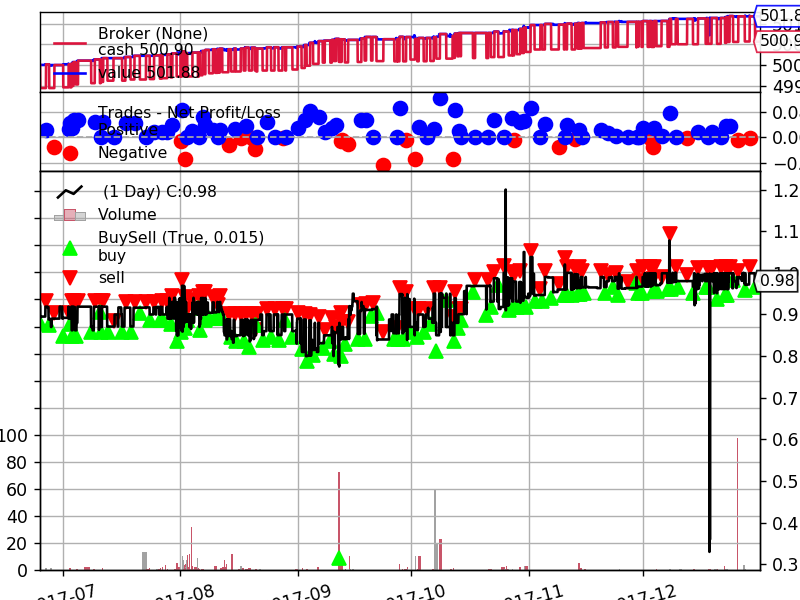

[[<Figure size 640x480 with 4 Axes>]]

In [9]:
cerebro.plot()